## <center>NYU CSCI-UA 9472 Artificial Intelligence </center>
   ### <center> Learning (Part II)</center>

<center>This week we will review some of the unsupervised learning models. Starting with the A priori algorithm, we will see how one can predict the probability of having customers simultaneously purchasing particular items from a grocery store or super market. We will then implement K-means and K-medoid and study how to determine the optimal value for K through the elbow method. We will implement the main Hierarchical clustering algorithms. Finally we will apply those algorithms to image segmentation and community detection.</center>


### Part I: Kernels and SVM


##### Exercise 1.1. A linear classifier

Consider the dataset given below. Start by learning a linear classifier for this dataset by minimizing the RSS criterion. 

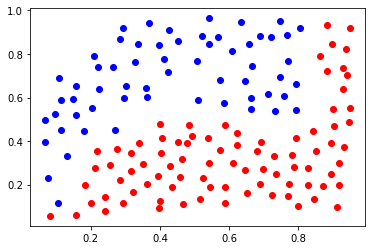

In [3]:
import scipy.io
import matplotlib.pyplot as plt

mat1 = scipy.io.loadmat('cluster_1.mat')['cluster_1']
mat2 = scipy.io.loadmat('cluster_2.mat')['cluster_2']

plt.scatter(mat1[:,0], mat1[:,1], c='b')
plt.scatter(mat2[:,0], mat2[:,1], c='r')
plt.show()

In [ ]:
# put your code here



##### Exercise 1.2. The kernel trick

From the linear classifier derive a kernel based classifier by

- 1) Replacing the regression weight vector $\beta$ by the linear combination $\beta =  \sum_i \lambda_i \phi(\bf x^{(i)})$ in the stochastic gradient updates


- 2) writing down the updates in the $\lambda_i$ (instead of the $\beta$)


- 3) replacing every occurence of $(\bf x^{(i)})^T(\bf x^{(j)})$ but the entry $K_{ij}$ of the kernel matrix $K(i,j) = \exp(-\|\bf x^{(i)} - \bf{x}^{(j)} \|^2/\sigma)$



- Finally get the value of the $\lambda_i$ by applying a sufficient number of updates in $\lambda_i$ and derive the classifier as $y(\bf x) = \bf \beta^T\bf x = \sum_{i}\lambda_i (\bf x^{(i)})^T(\bf x)$ in which we substitute the kernel to get the final classifier as $y(\bf x) = \bf \beta^T\bf x = \sum_{i}\lambda_i K(\bf x, \bf x^{(i)})$




### Part II: Clustering


##### Exercise 1.1. General K means

Consider the dataset given below. Implement the K means algorithm and run it on top of this dataset. 

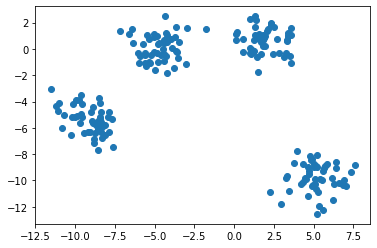

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

n_samples = 200
random_state = 170
X, y = make_blobs(n_samples=n_samples, centers = 4,random_state=random_state)

plt.scatter(X[:,0], X[:,1])
plt.show()


def Kmeans(data, K):
    
    '''function should implement a simple K means clustering with random 
    initilization of the centroids. K is the number of clusters'''


    return 

##### Exercise 1.2. The Elbow method

Run your algorithm with a number of clusters $K=1,2,3,4,5,6,7,8,9$ and $10$. For each of those values, Compute the Within-Cluster-Sum of Squared Error (i.e. $E = \sum_{\mathcal{C}_k}\sum_{i\in \mathcal{C}_k} (c_k - x_i)^2$) then plot this error as a function of $K$. What do you notice?


##### Exercise 1.3. The importance of initialization

Extend your implementation of K means from the previous exercise so that it takes an additional argument specifying the initialization. You should contain implementations of each of the following approaches

- Random partitioning (the method starts from a random assignment of the points)
- Forgy (The method picks $K$ feature vectors at random and assign the remaining points to the nearest centroid)
- K means++ (see below)
- MacQueen (see below)
- Kauffman (see below)

In the Macqueen Approach proposed by MacQueen (1967), one chooses K instances of the database (seeds) at random. We then assign, following the instance order, the rest of the instances to the cluster with nearest centroid. After each assignment a recalculation of the centroids has to be carried out

In the Kauffman approach, we first select the most centrally located instance. Then for every non selected instance $x_i$ repeat the following steps:
   - For every non selected instance $x_j$ calculate $C_{ji} = \max(D_j -d_{ji},0)$ where $d_{ji} = \|x_i - x_j\|$ and $D_j = \min_{s} d_{sj}$. $s$ being one of the selected seeds
   - Calculate the gain of selecting $x_i$ as $\sum_{j} C_{ji}$
Select the not yet selected instance $x_i$ which maximizes $\sum_{j} C_{ji}$. If there are $K$ selected seeds then stop. Otherwise go to step 2. 

In K means++, we choose a center uniformly at random among the points. For each point $x_i$ from $\mathcal{D}$, compute the distance $D(x_i)$ between $x_i$ and the nearest centroid that has already been chosen. Choose a new point at random as the next center using a weighted probability distribution where a new point is chosen with probability proportional to $D^2(x_i)$. Repeat the steps until $K$ centers have been chosen.


In [ ]:
def Kmeans(data, initialization):
    
    '''function should implement K means clustering for each of the 
    initializations listed above'''





    return 

##### Exercise 1.4. Semisupervised: Constrained K means. 

Clustering is traditionally viewed as an unsupervised method for data analysis. In some cases however, information about the problem domain might be available in addition to the the data instances themselves. Within such a framework, one approach is to define so-called 'Must Link' and 'Cannot link'. The former referring to points that must be placed in the same cluster. The latter referring to points that cannot be placed in the same cluster. One can then extend K-means as follows

1. Let $C_1, \ldots C_K$ denote the initial cluster centers
2. For each point $x_i$ in the dataset $\mathcal{D}$, assign the point to the closest cluster $C_j$ such that the point does not violate any of the constraint. If no such cluster exist, return Failure
3. For each cluster $C_j$, update its center by averaging al the points $d_j$ that have been assigned to it
4. Iterate between (2) and (3) until convergence 
5. Return ${C_1, \ldots C_K}$

The constraint check can be carried out as follows. For every point $d_i$ in the dataset with closest cluster $C_j$, you need to check that for every $(d_i,d_k)$ in the set of all constraints, the constraint is satisfied. 

Apply this extension to the dataset below. setting as the 'Must link' a unique cluster for all the samples in consi and as 'Cannot link' a different cluster for the points in distinct consi, consj.

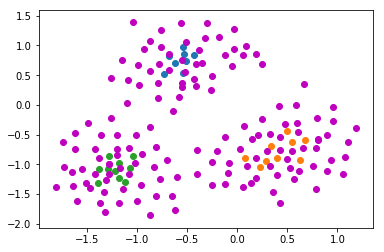

In [12]:
import scipy.io
import matplotlib.pyplot as plt

cluster1 = scipy.io.loadmat('cluster1.mat')['cluster1']
cluster2 = scipy.io.loadmat('cluster2.mat')['cluster2']
cluster3 = scipy.io.loadmat('cluster3.mat')['cluster3']

cons1 = scipy.io.loadmat('cons1.mat')['cons1']
cons2 = scipy.io.loadmat('cons2.mat')['cons2']
cons3 = scipy.io.loadmat('cons3.mat')['cons3']


plt.scatter(cons1[:,0], cons1[:,1])
plt.scatter(cons2[:,0], cons2[:,1])
plt.scatter(cons3[:,0], cons3[:,1])

plt.scatter(cluster1[:,0], cluster1[:,1], c='m')
plt.scatter(cluster2[:,0], cluster2[:,1], c='m')
plt.scatter(cluster3[:,0], cluster3[:,1], c='m')

plt.show()




##### Exercise 1.5. Image segmentation

K-means is commonly used in computer vision as a form of image segmentation. To each pixel of an image is associated its color described in RGB. The image to be segmented can then be represented as a set of points in a 3D data space. Consider the image below. By carefully initializing K means with the right number of clusters (and possibly merging subclusters), try to separate the parrot from the background. You might want to downsample the image

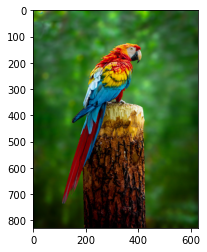

In [88]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('KmeansParrot.jpeg')
imgplot = plt.imshow(img)
plt.show()

### Part II : Reinforcement Learning

Recall that reinforcement learning relies on the interaction of the learning algorithm (which we call agent in this framework) and its environment by means of the actions the learner takes, which impact the environment and the rewards he received in return for his actions.   

#### IIa : Greedy approach and $\varepsilon$-Greedy approaches

##### Exercise I.1. Stationnary approach

We will start by considering a simple k-armed bandit problem such as the one discussed in class. Here we take $k = 4$ and we take the reward to follow a Gaussian distribution with mean $mu_i$ and $\sigma = 1$. 

In [ ]:
mu1 = 0 # put your choice for the value 
# (the mean of the distribution). We assume the distribution of the 
mu2 = 0
mu3 = 0
mu4 = 0

sigma1 = 1
sigma2 = 1
sigma3 = 1
sigma4 = 1




maxIter = 100
iter = 0

while iter < maxIter:
    
    
    action = 0 # sample an action at random from 0 to 3
    
    reward = 0 # sample the reward according to the Gaussian distribution
    
    value  = 0 # update the value 
    
    
    iter +=1
    

##### Exercise I.2. Non stationnary version

Now code the non stationnary version of the k-bandit algorithm

In [ ]:
mu1 = 0 # put your choice for the value 
# (the mean of the distribution). We assume the distribution of the 
mu2 = 0
mu3 = 0
mu4 = 0

sigma1 = 1
sigma2 = 1
sigma3 = 1
sigma4 = 1




maxIter = 100
iter = 0

while iter < maxIter:
    
    
    action = 0 # sample an action at random from 0 to 3
    
    reward = 0 # sample the reward according to the Gaussian distribution
    
    value  = 0 # update the value 
    
    
    iter +=1
    

#### Exercise II. Escape room


In this exercise, we will tackle a simple reinforcement learning problem. Consider the map given below. There are 5 rooms + the garden. We would like to train an agent to get out of the house as quickly as possible. To set up the evironment, we will consider 6 possible state (the rooms in which the agent is located) and 6 possible actions (moving from one room to any other room). 

The Q-table can thus be encoded by a $6$ by $6$ matrix. We will consider three types of rewards. Impossible moves (example 1 to 4) will be penalized by $1$. possible moves will be associated to a $0$ reward. Finally any move leading to an escape (e.g. 2 to 6) will be rewarded by 100. 


Map
<img src="QLearningImage2.png" width="700" height="600">

#### Question II.1

As a first approach, we will just run a couple of pure exploration iterations. Just fill out the loop below and run a couple of 

In [ ]:
done = False 

while not done: 
    
    
    '''complete the greedy steps by sampling an action at random and updating the state of the environement
    until the variable Done is not set to True. Set this variable to True when the agent is able to escape the house'''
    
    
    
    
    
    

#### Question II.2

Now that you can solve the greedy approach. We will start to exploit and we will do that through the use of a $Q$ table. In this case, as indicated in the statement of the exercise, the Q-table is 6x6. Train the agent by alternating between exploitation and exploration. 

Since we want to update the $Q$-table, we will now add a line of the form 

$$Q[s, a] \leftarrow (1-\alpha)Q[s,a] + \alpha\left(R[a] + \gamma\max_{a'}Q[s',a']\right)$$

When in the exploration framework, we will sample the action at random as in Question III.1. When in the exploitation framework however, we will simply choose the action as the one that maximizes the entry in the $Q$-table for the particular state at which we are. Hence we have $a^* = \underset{a}{\operatorname{argmax}} Q[s,a]$. 


Code this epsilon-greedy approach below. You can start $\epsilon =0.8$ 
Take a sufficiently small learning rate (you can for example start with 0.5) and a relatively large discount factor $\gamma=0.9$ (You can later change those values to see how they affec the learning)

Once you are done with the algorithm, try a couple of different values for $\epsilon$ and describe the evolution in the learning. 

In [ ]:
done = False 

epsilon = 0
gamma = 0
alpha = 0

for episode in range(NumEpisodes):

    done =False 
    
    while not done: 
    
    
    '''Draw a number at random from the uniform distribution between 0 and 1''' 
    
    
    '''If the number is less then epsilon, explore if it is larger, exploit'''
    
    if randomDraw < epsilon:
        
        # exploration
        
        '''update the Q-table'''
        
    else:
        
        # exploitation
        
        '''update the Q-table'''
        
        
    


#### Exercise III.1. Gym Self Driving cab


There are several libraries in python including RLLib, pybrain,... that can be used to code reinforcement learning approaches. When Starting, a good approach is to consider the [Gym toolkit](https://gym.openai.com/) from openAI. Gym is compatible with both Theano and TensorFlow and contains a collection of examples that can be used to illustrate most of the reinforcement learning frameworks. Install gym with "pip install gym" (you may need !pip install cmake 'gym[atari]') or use 

"git clone https://github.com/openai/gym"

"cd gym"

"pip install -e ."

if you prefer to clone the git repository. 


(based on the [learndatasci](https://www.learndatasci.com/) tutorials)

As a starting point, we will consider the [self driving cab](https://gym.openai.com/envs/Taxi-v2/) example. Use the lines below to display the map for this particular example. The objective in this exercise is to train the cab through RL in order to (1) Drop off the passenger at the right location (2) save as much time as possible by taking the shortest path from the pick up to the drop off location and (3) respect traffic rules. 

- The cab is represented by the yellow rectangle. It is free to move on a 5x 5 grid and its spatial state can thus be described by a dimension 25 vector. 

- Wherever it is, the cab has four possible destinations, the four positions 'R', 'Y' 'G' and 'B'.  

- We will further assume that the passengers can be picked up in any of the four locations R, G, Y and B. On top of those four locations, we also need to account for the framework in which the passenger is inside the cab. Any passenger position can thus be encoded by 5 binary variables.


In this case, the state of the environment can thus be encoded by $5\times 5 \times 4 \times 5$ binary variables. 


- Finally we need to encode the possible actions that the cab can take. At each location the cab can move in each of the four directions - east, west, north, south but it can also pick up or dropoff a passenger. We can thus encode the actions of the cab through 6 binary variables. 




In [ ]:
import gym

env = gym.make("Taxi-v2").env

env.render()

__The cab is not supposed to cross the vertical bars which are representing wall and we will thus enforce this by setting the reward associated to impossible moves to -1__

Gym lets us access the environement by means of the variable 'env'. The variable comes up with 3 methods. 

- env.reset
- env.step (apply a step)
- env.render (display the current state of the environment)

You can also use env.action_space as well as env.observation_space to respectively access the set of actions and existing states of the environment. 

Use the first and third methods to reset and display the original state of your environment after resetting it.

In [ ]:
env.render(129)
env.step(5)
env.render()

The point of this first exercise is for the agent to learn a mapping from the existing states to the optimal actions.

__Step I. Interacting with and displaying the environment.__ 

Each state o fthe environment can either be encoded as a single number (between 0 and 499) or as a (5,5,5,4) tuple of the form (cab row, cab col, passenger index, direction). To move between the two, gym provides teh method 'encode' of the variable 'env'. Using the lines below, together with the render method discussed above, set and display a couple of environment states


__Step II. Taking actions based on rewards__ 

To each state of the environment is associated a Reward table which can be accessed through the line env.P[n] where n is the number encoding a particular state of the environment. Look at the reward tables of the states you rendered above. 

The reward table has 5 rows (encoding the actions) and four columns of the form (probability, nextstate, reward, done). In this framework we don't consider any probability so this variable is always set to $1$. The last column indicates when the cab has droped a passenger at the right location. 

Each successful dropoff concludes one episode. 


#### Exercise III.1. 

Implement a full episode. That is we want an infinite loop that stops when the passenger has been droped. 

(hint: to sample an action you can use the method 'env.action_space.sample()'. Then note that env.step returns a four tuple of the form (state, reward, done, info) where 'done' indicates whether the passenger has been droped.)

In [ ]:
'''This script should run one episode in which the cab takes random actions 
until the passenger is droped at the right location'''

import numpy as np

done = False

frames = []

maxIter = 200
num_iter = 0

while not done: # change the condition for the loop to stop when the state 
    
    
    # put your code here
    
    
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )
    
    num_iter+=1


Once you have stored all the frames, use the lines below to play the resulting movie.

In [ ]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'].getvalue())
        sleep(.1)
        
print_frames(frames)

#### Exercise III.2. 

We will now see how one can exploit the previous experience of our agent to increase the rewards over time through Q-learning. In Q-learning the idea is to keep track of the actions that were beneficial by updating a mapping from any pair (environment state, action) to some number encoding the value of the pair. Q-values are updated following the equation 

\begin{align}
Q(\text{state}, \text{action}) &\leftarrow (1-\alpha) Q(\text{state}, \text{action}) \\
&+ \alpha (\text{reward} + \gamma \max_a Q(\text{next state}, \text{all actions}))\end{align}


That is we not only try to maximize the immediate reward but we also try to look for the action that will lead to the highest potential reward one step ahead. In the equation above, $\alpha$ can be interpreted as a __learning rate__. $\gamma$ which is known as the __discount factor__ indicates how much importance we want to give to the future rewards.  

The __Q-table__ is a table with 500 rows corresponding to the 500 states and 6 columns encoding each of the 6 actions. We will use a numpy array of zero to encode this table. Finally in order for our learning algorithm to be efficient, we will alternate between exploitation (with probability epsilon) and exploitation with probability (1-epsilon). 


Extend the "random cab" episode from Exercise II.1. in order to account for the Q table. 

- Use the line 'next_state, reward, done, info = env.step(action)'  to update the environment 
- Select the action either at random or according to the Q-table

(Hint: to decide between exploration and exploitation, split the $[0,1]$ interval between a $[0,\varepsilon]$ subinterval and a $[\varepsilon,1]$ subinterval. Then draw a number uniformly at random from the $[0,1]$ interval. If the number falls in $[0,\varepsilon]$ interval then pick an action at random. Otherwise,  )

In [ ]:
'''This script should code one episode in which a random action is 
taken with probability epsilon and the action maximizing Q is taken with probability (1-epsilon)'''


import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 100001):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        
     # put your code here
        
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")



#### Exercise III.3. Evaluating the agent 

Once you have learned the Q-table, evaluate the agent behavior by choosing at each the step and in each state, the action that maximizes the value of the Q-table and play the resulting movie using the 

In [ ]:
# put your code here


### Part V : Value function approximation

<img src="parametricEx.png" width=400 height=400 />

We consider the environment given above (arrows indicate a fixed policy). In this environment, just as in the Wumpus world, the action in every state are up, down, left and right. In this framework we will adopt a slightly different approach and we will assign reward to states rather than actions (the objective being to escape from the room).

The two terminal states have rewards $+1$ and $-1$. All the other states have reward $-0.04$. We will add some difficulty to the problem by considering that the actions of the agent are unreliable. We will assume that each time the agent selects an action, this action is actually carried out with probability 80% while there is a 10% chance that the agent will perform the orthogonal alternatives (see Fig. below). This is equivalent to the $\varepsilon$-greedy policy we used in the bandit framework except that we now use it on states rather than actions. 

In such a framework, we can either decide to learn the utility directly througha simple discounted running average

$$U^\pi(s) = \mathbb{E}\left[\sum_{t=0}^\infty \gamma^tR(S_t)\right]$$

we can also rely on the Bellman equation and update our value estimates as 

$$U^\pi(s)\leftarrow U^{\pi}(s) + \alpha\left[R(s) + \gamma U^\pi(s') - U^\pi(s)\right]$$

Note that the reward above is the reward of the state we reach. Alternatively, when the state space is too large, we could decide to learn a parametric representation of the utility. In this case, we have  

$$\hat{U}^\pi(s) = \theta_1 f_1 + \theta_2 f_2 + ....$$

where each $f_i(s)$ is a carefully chosen function of the state $s$. 

For the environment above, we could for example choose to parametrize our model as a function of the $(x, y)$ location of our agent. 

$$\hat{U}_\theta(x, y) = \theta_0 + \theta_1x + \theta_2 y$$

We can then update our parametric model by minimizing the oberved utility $u_j(s)$ after the $j^{th}$ trial and the prediction given by our parametric model $U_\theta(s)$. If we choose to use the $\ell_2$ loss,

\begin{align}
\ell(\theta) = \|\hat{U}_\theta(s) - u_j(s)\|^2 
\end{align}

we get the updates 

\begin{align}
\theta_0 &\leftarrow \theta_0 + \alpha(u_j(s) - \hat{U}_\theta(s))\\
\theta_1 &\leftarrow \theta_1 + \alpha(u_j(s) - \hat{U}_\theta(s))x\\
\theta_2 &\leftarrow \theta_2 + \alpha(u_j(s) - \hat{U}_\theta(s))y
\end{align}

Implement each of the three approaches listed above. 


